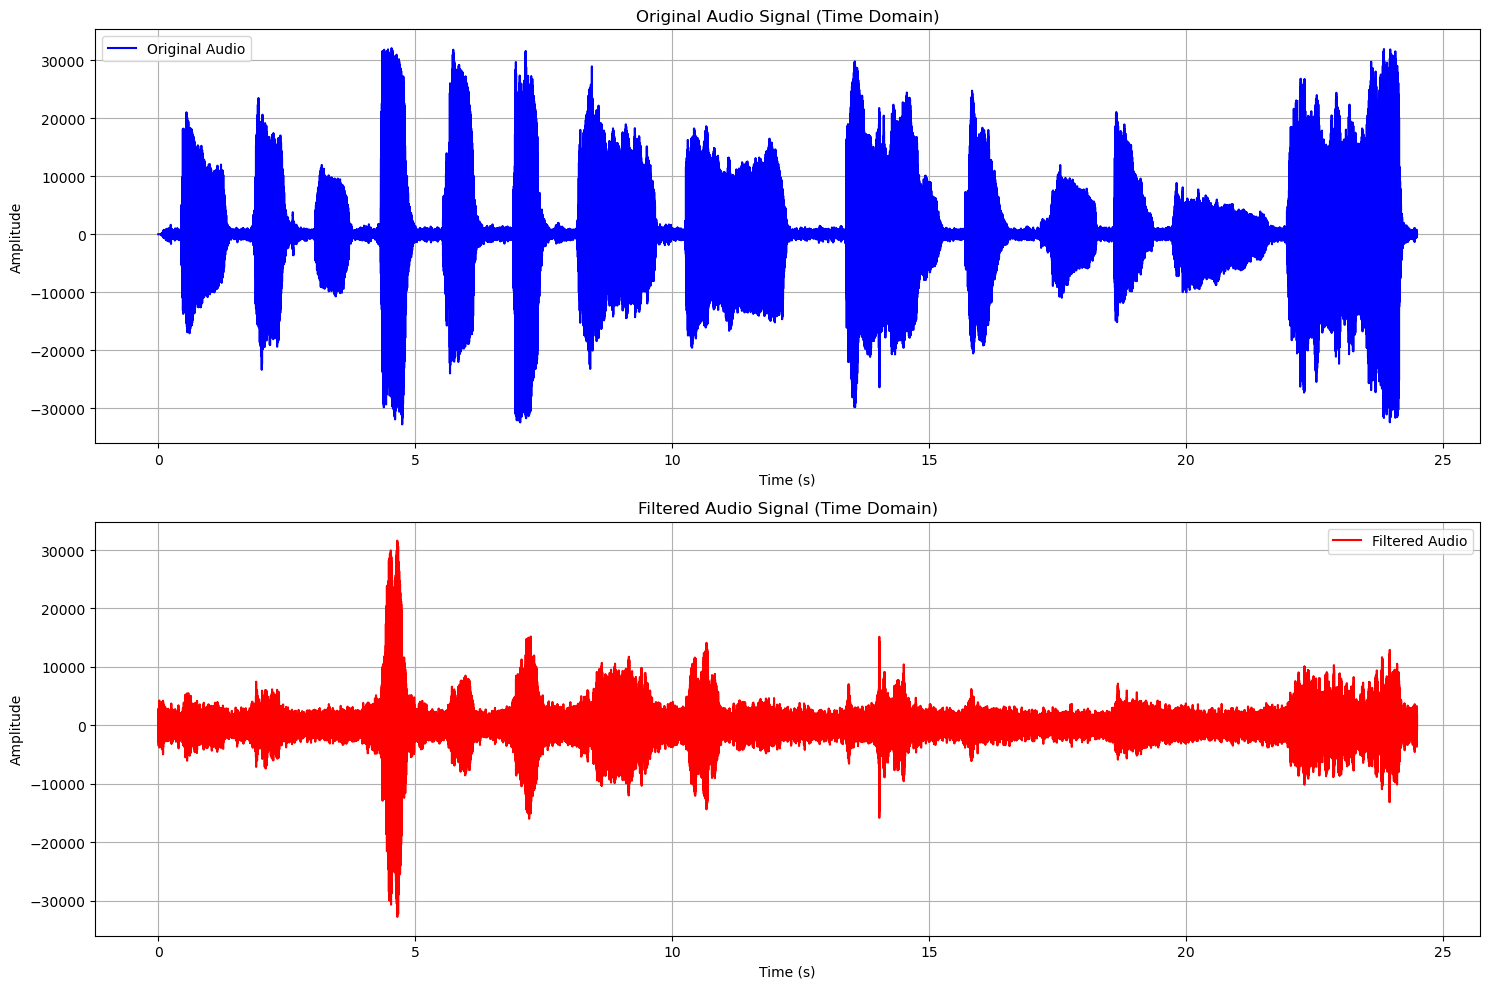

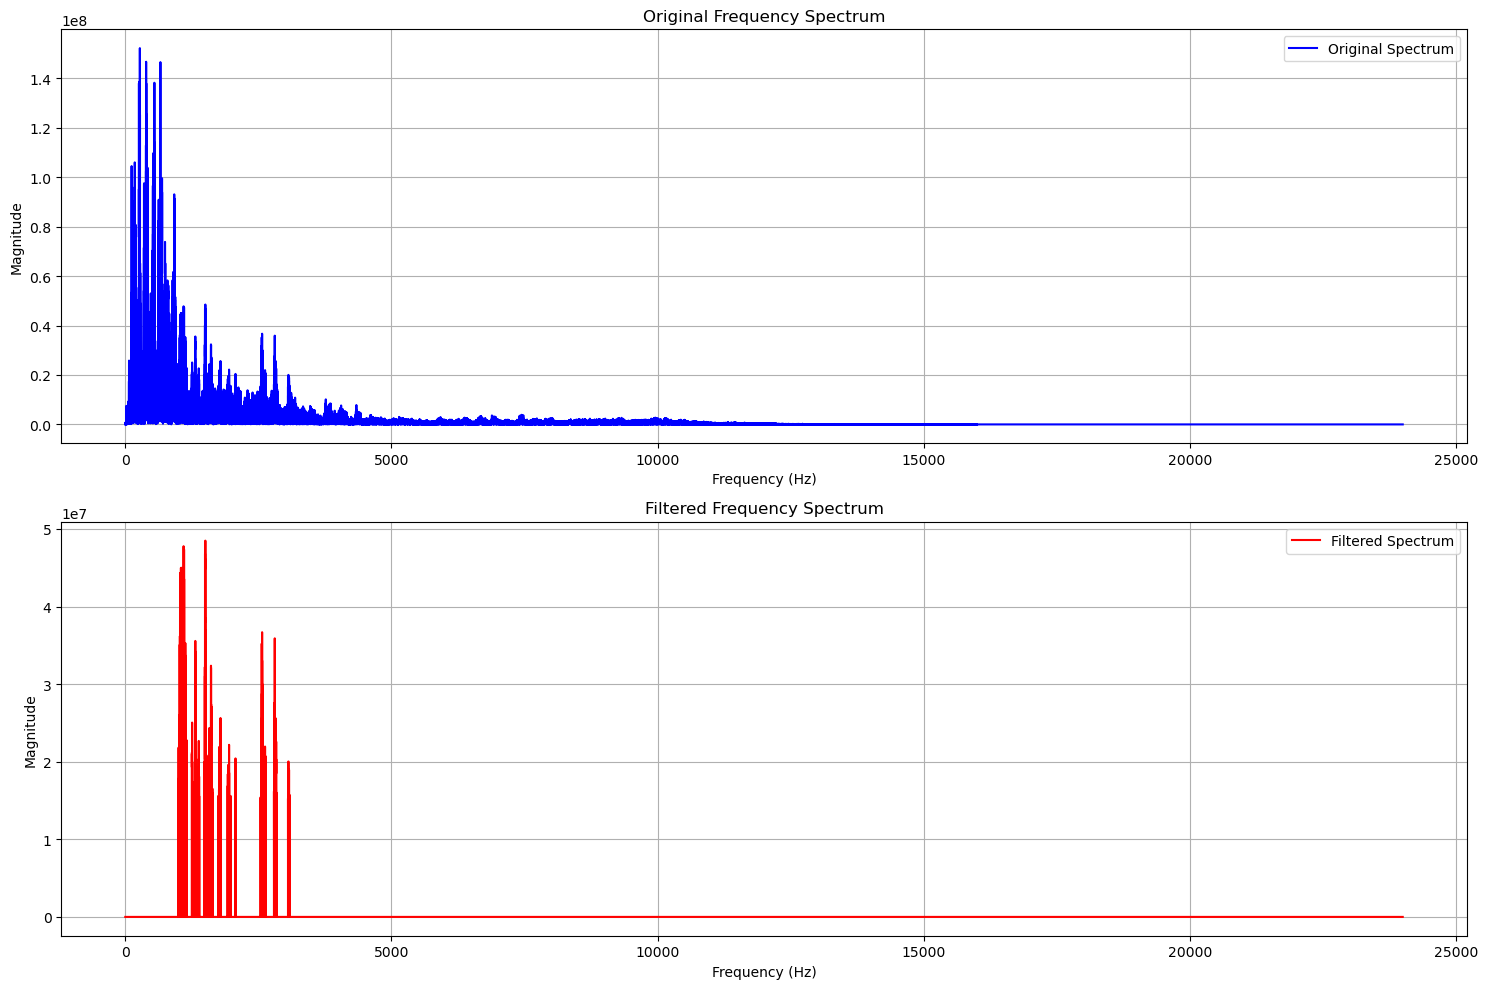

In [68]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def process_audio_dft(input_file, output_file):

    sample_rate, audio_data = wavfile.read(input_file)
    

    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)
    
 
    audio_data = audio_data.astype(float)

    duration = len(audio_data) / sample_rate
    time = np.linspace(0, duration, len(audio_data))
    

    fft_data = np.fft.fft(audio_data)
    frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
    magnitude_spectrum = np.abs(fft_data)
    

    threshold = 0.1 * np.max(magnitude_spectrum)
    fft_filtered = fft_data.copy()
    fft_filtered[magnitude_spectrum < threshold] = 0
    

    cutoff_freq = 1000
    fft_filtered[np.abs(frequencies) < cutoff_freq] = 0
    
 
    filtered_audio = np.real(np.fft.ifft(fft_filtered))
    

    original_normalized = audio_data * (32767 / np.max(np.abs(audio_data)))
    filtered_normalized = filtered_audio * (32767 / np.max(np.abs(filtered_audio)))
    

    original_normalized = original_normalized.astype(np.int16)
    filtered_normalized = filtered_normalized.astype(np.int16)
    

    wavfile.write(output_file, sample_rate, filtered_normalized)
    

    plt.figure(figsize=(15, 10))
    

    plt.subplot(2, 1, 1)
    plt.plot(time, original_normalized, color='blue', label='Original Audio')
    plt.title('Original Audio Signal (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    

    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_normalized, color='red', label='Filtered Audio')
    plt.title('Filtered Audio Signal (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(15, 10))
    

    pos_freq_mask = (frequencies >= 0) & (frequencies < sample_rate/2)
    

    plt.subplot(2, 1, 1)
    plt.plot(frequencies[pos_freq_mask], 
             magnitude_spectrum[pos_freq_mask], color='blue', label='Original Spectrum')
    plt.title('Original Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    
    # Filtered Frequency Spectrum
    plt.subplot(2, 1, 2)
    filtered_magnitude = np.abs(fft_filtered)
    plt.plot(frequencies[pos_freq_mask], 
             filtered_magnitude[pos_freq_mask], color='red', label='Filtered Spectrum')
    plt.title('Filtered Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return sample_rate, filtered_normalized

if __name__ == "__main__":
    input_file = 'Singing.wav'
    output_file = 'singinggg_dft.wav'
    sample_rate, processed_audio = process_audio_dft(input_file, output_file)

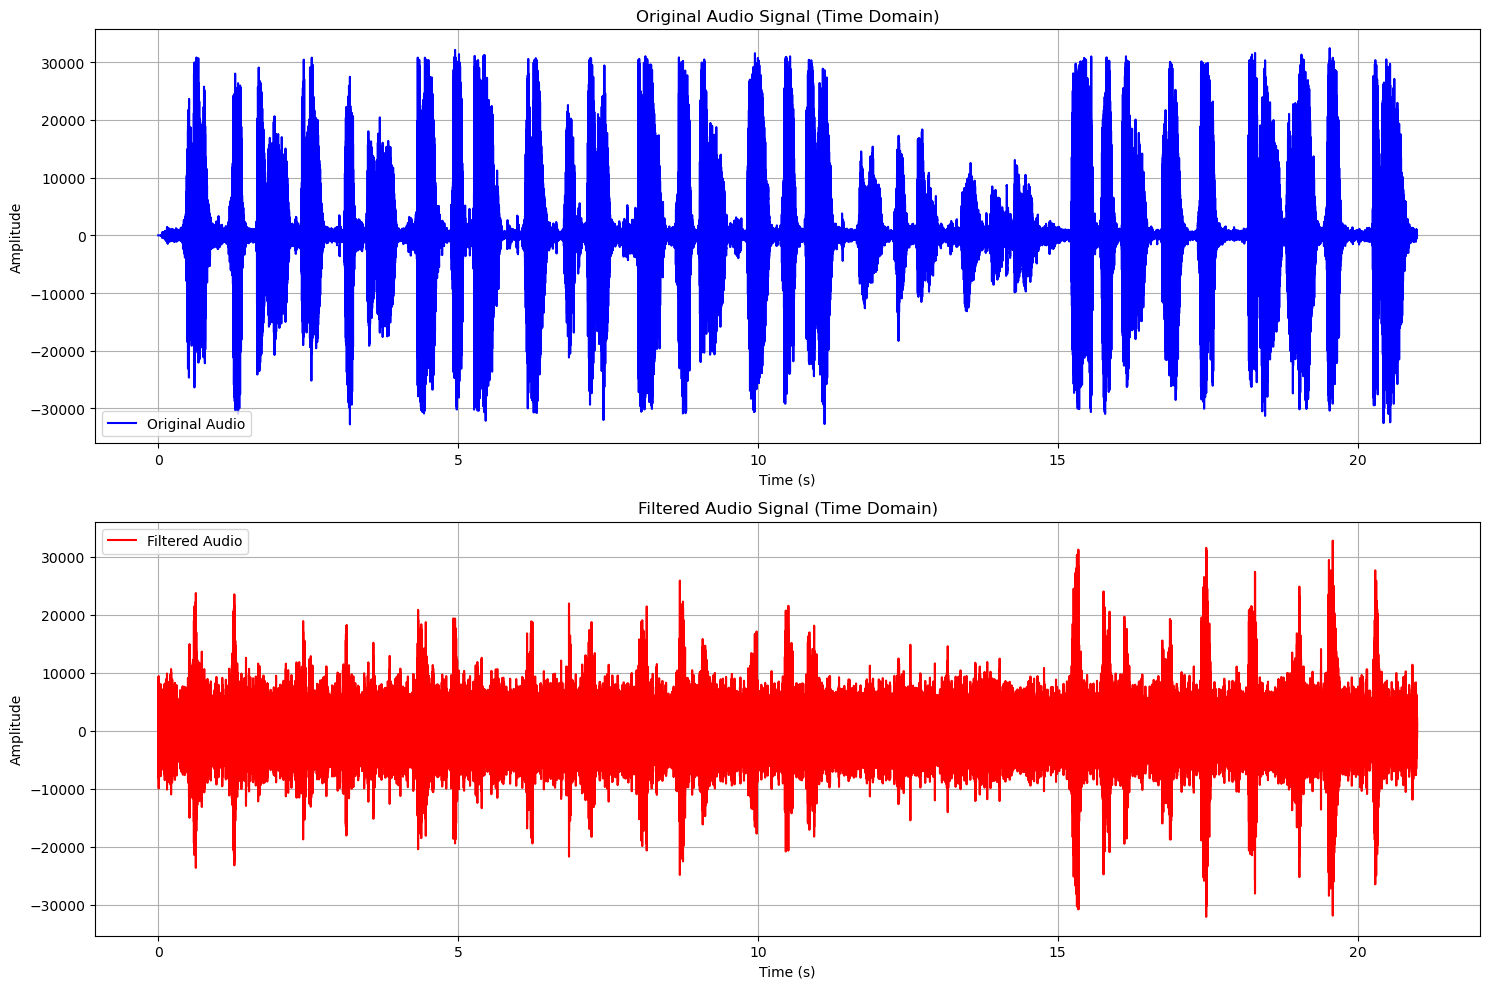

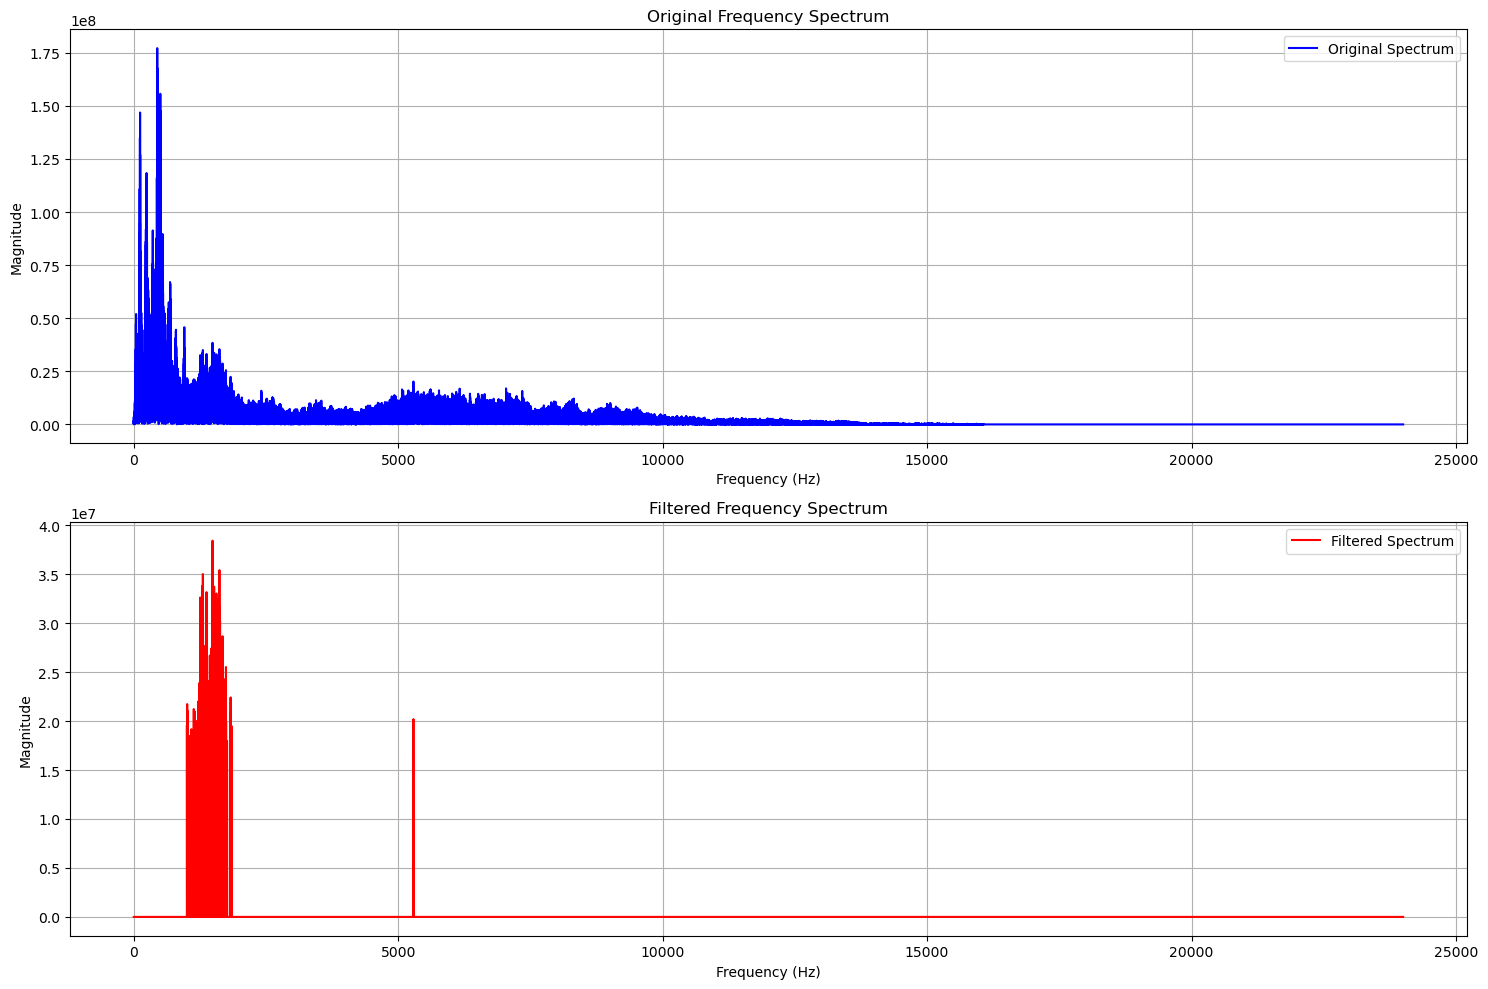

In [76]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def process_audio_dft(input_file, output_file):

    sample_rate, audio_data = wavfile.read(input_file)
    

    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)
    
 
    audio_data = audio_data.astype(float)

    duration = len(audio_data) / sample_rate
    time = np.linspace(0, duration, len(audio_data))
    

    fft_data = np.fft.fft(audio_data)
    frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
    magnitude_spectrum = np.abs(fft_data)
    

    threshold = 0.1 * np.max(magnitude_spectrum)
    fft_filtered = fft_data.copy()
    fft_filtered[magnitude_spectrum < threshold] = 0
    

    cutoff_freq = 1000
    fft_filtered[np.abs(frequencies) < cutoff_freq] = 0
    
 
    filtered_audio = np.real(np.fft.ifft(fft_filtered))
    

    original_normalized = audio_data * (32767 / np.max(np.abs(audio_data)))
    filtered_normalized = filtered_audio * (32767 / np.max(np.abs(filtered_audio)))
    

    original_normalized = original_normalized.astype(np.int16)
    filtered_normalized = filtered_normalized.astype(np.int16)
    

    wavfile.write(output_file, sample_rate, filtered_normalized)
    

    plt.figure(figsize=(15, 10))
    

    plt.subplot(2, 1, 1)
    plt.plot(time, original_normalized, color='blue', label='Original Audio')
    plt.title('Original Audio Signal (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    

    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_normalized, color='red', label='Filtered Audio')
    plt.title('Filtered Audio Signal (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(15, 10))
    

    pos_freq_mask = (frequencies >= 0) & (frequencies < sample_rate/2)
    

    plt.subplot(2, 1, 1)
    plt.plot(frequencies[pos_freq_mask], 
             magnitude_spectrum[pos_freq_mask], color='blue', label='Original Spectrum')
    plt.title('Original Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    
    # Filtered Frequency Spectrum
    plt.subplot(2, 1, 2)
    filtered_magnitude = np.abs(fft_filtered)
    plt.plot(frequencies[pos_freq_mask], 
             filtered_magnitude[pos_freq_mask], color='red', label='Filtered Spectrum')
    plt.title('Filtered Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return sample_rate, filtered_normalized

if __name__ == "__main__":
    input_file = 'Espares.wav'
    output_file = 'Espares!.wav'
    sample_rate, processed_audio = process_audio_dft(input_file, output_file)

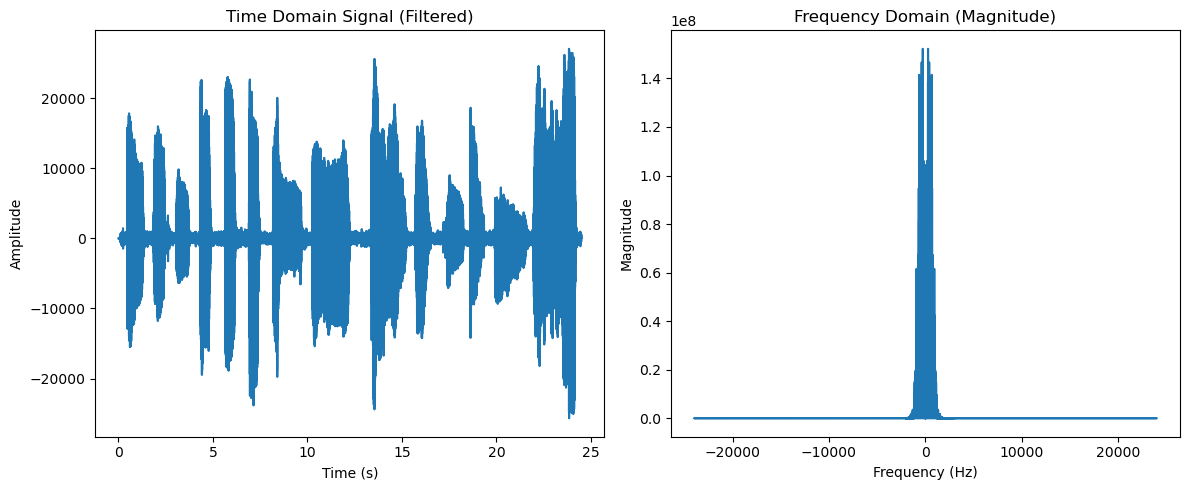

In [84]:
# Load audio file
sample_rate, audio_data = wavfile.read('Singing.wav')

# Add Gaussian noise
noise_level = 0.1  # Adjust noise level as needed
noise = noise_level * np.random.randn(len(audio_data))
noisy_audio_data = audio_data + noise

# Design a low-pass filter
cutoff_freq = 1000  # Adjust cutoff frequency as needed
b, a = signal.butter(4, cutoff_freq, 'low', fs=sample_rate)

# Apply the filter to the noisy audio data
filtered_audio_data = signal.filtfilt(b, a, noisy_audio_data)

# Calculate time and frequency domain representations
t = np.arange(len(filtered_audio_data)) / sample_rate
signal_fft = np.fft.fft(filtered_audio_data)
frequencies = np.fft.fftfreq(len(filtered_audio_data), d=1/sample_rate)

# Plot time domain signal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, filtered_audio_data)
plt.title("Time Domain Signal (Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot frequency domain magnitude
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.abs(signal_fft))
plt.title("Frequency Domain (Magnitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()